In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Batting Analysis

In [2]:
df_batting = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_batting.csv')

In [3]:
df_batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


In [4]:
top_batsmen = df_batting.groupby('batsmanName')['runs'].sum().sort_values(ascending=False)
top_batsmen.head(10)

batsmanName
Virat Kohli         296
Max O'Dowd          242
Suryakumar Yadav    239
Jos Buttler(c)â€    225
Kusal Mendisâ€      223
Sikandar Raza       219
Pathum Nissanka     214
Alex Hales          212
Lorcan Tuckerâ€     204
Glenn Phillips      201
Name: runs, dtype: int64

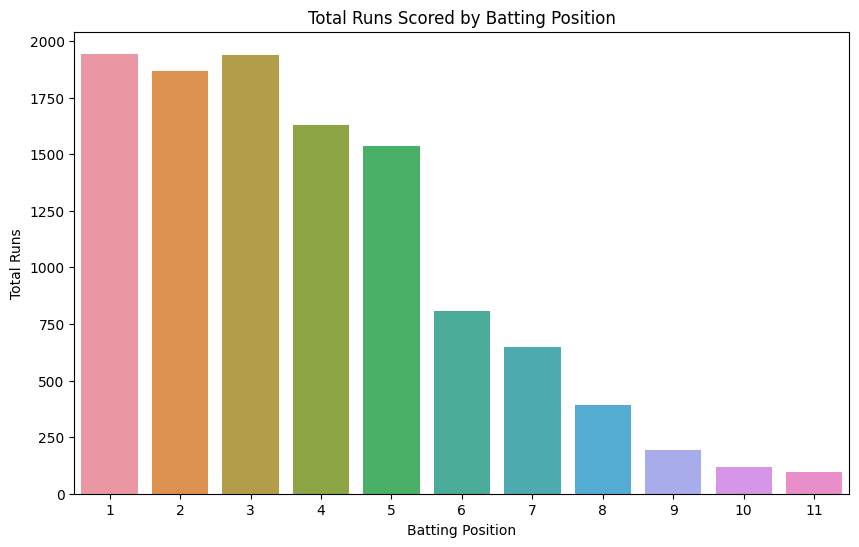

In [5]:
position_performance = df_batting.groupby('battingPos')['runs'].sum().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=position_performance.index, y=position_performance.values)
plt.title('Total Runs Scored by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Total Runs')
plt.xticks(rotation=0)
plt.show()

In [6]:
boundary_analysis = df_batting.groupby('batsmanName')[['4s', '6s']].sum()
boundary_analysis['Total Boundaries'] = boundary_analysis['4s'] + boundary_analysis['6s']
top_boundary_batsmen = boundary_analysis.sort_values(by='Total Boundaries', ascending=False).head(10)
top_boundary_batsmen.head(10)

,4s,6s,Total Boundaries
batsmanName,,,
Suryakumar Yadav,26,9,35
Virat Kohli,25,8,33
Jos Buttler(c)â€,24,7,31
Max O'Dowd,22,8,30
Alex Hales,19,10,29
Glenn Phillips,19,8,27
Kusal Mendisâ€,17,10,27
Sikandar Raza,16,11,27
Lorcan Tuckerâ€,19,4,23


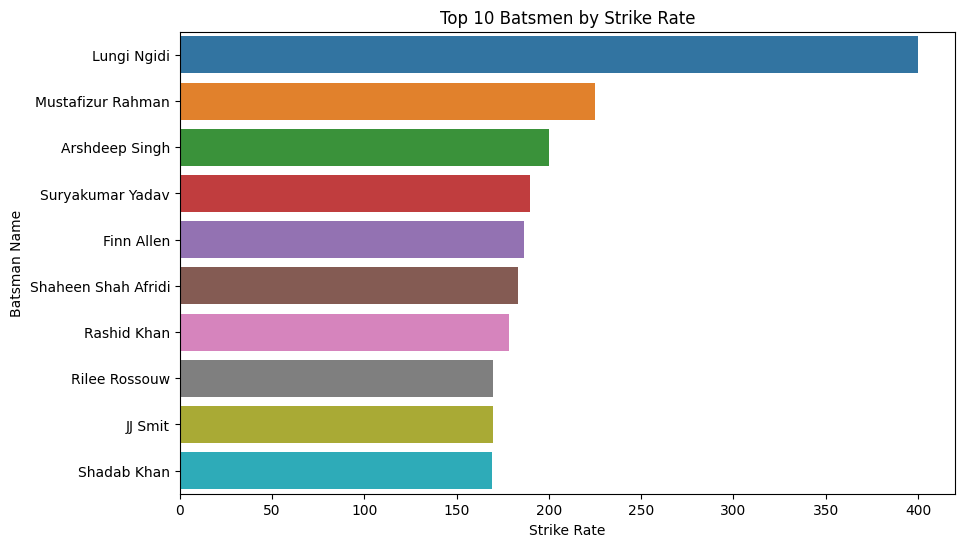

In [7]:
strike_rate_df = df_batting.groupby('batsmanName').agg({'runs': 'sum', 'balls': 'sum'}).reset_index()

strike_rate_df['Strike Rate'] = (strike_rate_df['runs'] / strike_rate_df['balls']) * 100

top_strike_rate_batsmen = strike_rate_df.sort_values(by='Strike Rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Strike Rate', y='batsmanName', data=top_strike_rate_batsmen)
plt.title('Top 10 Batsmen by Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman Name')
plt.show()

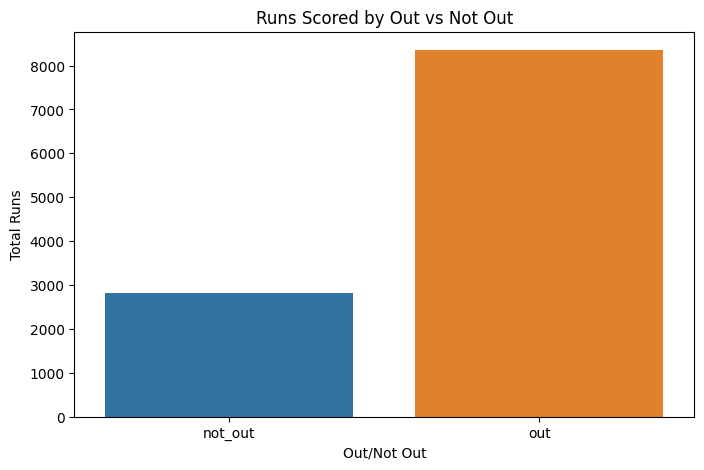

In [8]:
outs_performance = df_batting.groupby('out/not_out')['runs'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=outs_performance.index, y=outs_performance.values)
plt.title('Runs Scored by Out vs Not Out')
plt.xlabel('Out/Not Out')
plt.ylabel('Total Runs')
plt.show()

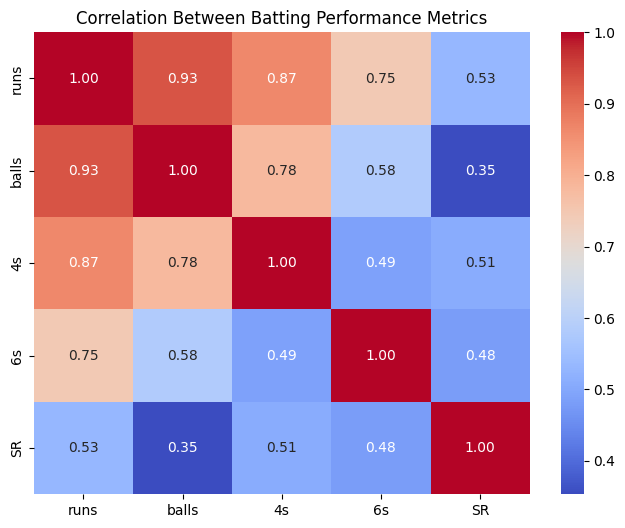

In [9]:
df_batting['runs'] = pd.to_numeric(df_batting['runs'], errors='coerce')
df_batting['balls'] = pd.to_numeric(df_batting['balls'], errors='coerce')
df_batting['4s'] = pd.to_numeric(df_batting['4s'], errors='coerce')
df_batting['6s'] = pd.to_numeric(df_batting['6s'], errors='coerce')
df_batting['SR'] = pd.to_numeric(df_batting['SR'], errors='coerce')

cleaned_df_batting = df_batting.dropna(subset=['runs', 'balls', '4s', '6s', 'SR'])

correlation_matrix = cleaned_df_batting[['runs', 'balls', '4s', '6s', 'SR']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Batting Performance Metrics')
plt.show()

Bowling Analysis

In [10]:
df_bowling = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_bowling.csv')

In [11]:
df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [12]:
top_bowlers = df_bowling.groupby('bowlerName').agg({
    'wickets': 'sum',
    'runs': 'sum',
    'overs': 'sum'
}).reset_index()

top_bowlers['Economy Rate'] = (top_bowlers['runs'] / top_bowlers['overs']).fillna(0)
top_wicket_takers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)
top_economy_bowlers = top_bowlers.sort_values(by='Economy Rate').head(10)

In [13]:
print("\nTop 10 Bowlers by Economy Rate:")
top_economy_bowlers[['bowlerName', 'Economy Rate']]


Top 10 Bowlers by Economy Rate:


,bowlerName,Economy Rate
95,Nasum Ahmed,3.500000
85,Moeen Ali,4.500000
0,Aayan Afzal Khan,4.750000
130,Zahoor Khan,4.750000
57,Jason Holder,4.803922
19,Bernard Scholtz,5.083333
46,Gerhard Erasmus,5.250000
96,Naveen-ul-Haq,5.250000
33,Colin Ackermann,5.285714
8,Anrich Nortje,5.433526


In [14]:
print("Top 10 Wicket Takers:")
top_wicket_takers[['bowlerName', 'wickets']]

Top 10 Wicket Takers:


,bowlerName,wickets
126,Wanindu Hasaranga de Silva,15
15,Bas de Leede,13
109,Sam Curran,13
22,Blessing Muzarabani,12
100,Paul van Meekeren,11
60,Josh Little,11
111,Shadab Khan,11
112,Shaheen Shah Afridi,11
8,Anrich Nortje,11
116,Sikandar Raza,10


In [15]:
team_bowling_performance = df_bowling.groupby('bowlingTeam').agg({
    'wickets': 'mean',
    'runs': 'mean',
    'overs': 'mean'
}).reset_index()

team_bowling_performance['Economy Rate'] = (team_bowling_performance['runs'] / team_bowling_performance['overs']).fillna(0)

print("Bowling Performance by Team:")
team_bowling_performance[['bowlingTeam', 'wickets', 'Economy Rate']]

Bowling Performance by Team:


,bowlingTeam,wickets,Economy Rate
0,Afghanistan,0.842105,7.553191
1,Australia,0.916667,8.245839
2,Bangladesh,1.035714,7.910296
3,England,1.216216,7.259696
4,India,1.057143,7.642726
5,Ireland,0.767442,8.313998
6,Namibia,0.842105,6.449400
7,Netherlands,0.980392,6.869679
8,New Zealand,1.480000,7.127883
9,Pakistan,1.125000,6.628959


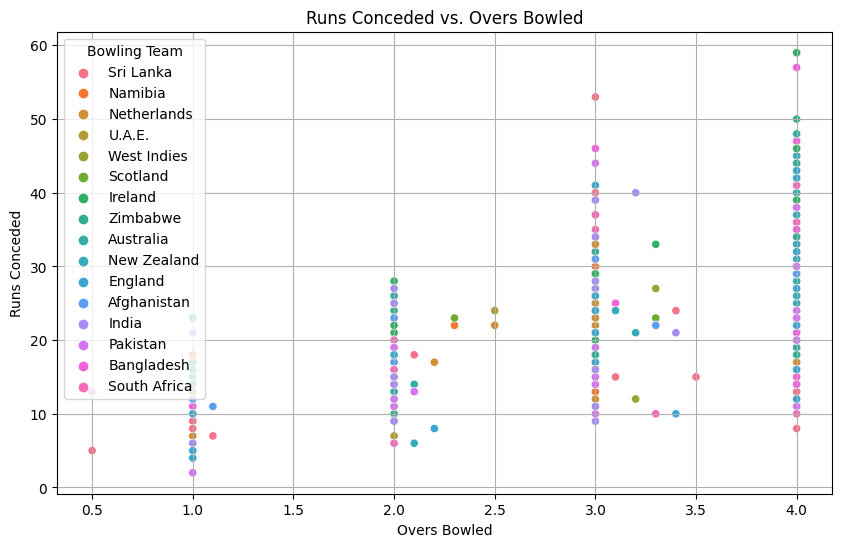

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bowling, x='overs', y='runs', hue='bowlingTeam')
plt.title('Runs Conceded vs. Overs Bowled')
plt.xlabel('Overs Bowled')
plt.ylabel('Runs Conceded')
plt.grid()
plt.legend(title='Bowling Team')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


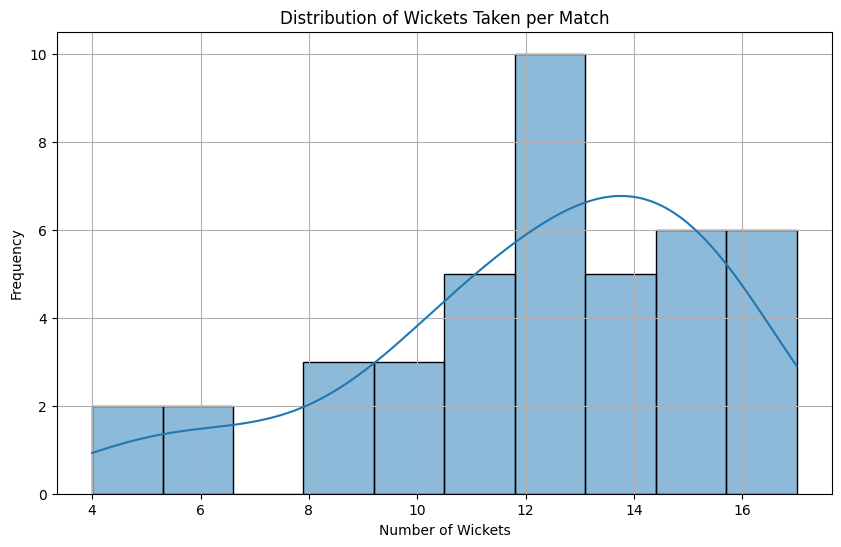

In [17]:
wickets_per_match = df_bowling.groupby('match_id')['wickets'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(wickets_per_match['wickets'], bins=10, kde=True)
plt.title('Distribution of Wickets Taken per Match')
plt.xlabel('Number of Wickets')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [18]:
df_match = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_match.csv') 

In [19]:
df_bowling = df_bowling.merge(df_match[['match_id', 'matchDate']], on='match_id')

In [20]:
df_bowling['matchDate'] = pd.to_datetime(df_bowling['matchDate'])

In [21]:
total_wickets = df_bowling.groupby('bowlerName')['wickets'].sum().reset_index()

top_10_bowlers = total_wickets.sort_values(by='wickets', ascending=False).head(10)

top_10_bowlers_list = top_10_bowlers['bowlerName'].tolist()
print("Top 10 Bowlers:")
print(top_10_bowlers)

Top 10 Bowlers:
                     bowlerName  wickets
126  Wanindu Hasaranga de Silva       15
15                 Bas de Leede       13
109                  Sam Curran       13
22          Blessing Muzarabani       12
100           Paul van Meekeren       11
60                  Josh Little       11
111                 Shadab Khan       11
112         Shaheen Shah Afridi       11
8                 Anrich Nortje       11
116               Sikandar Raza       10


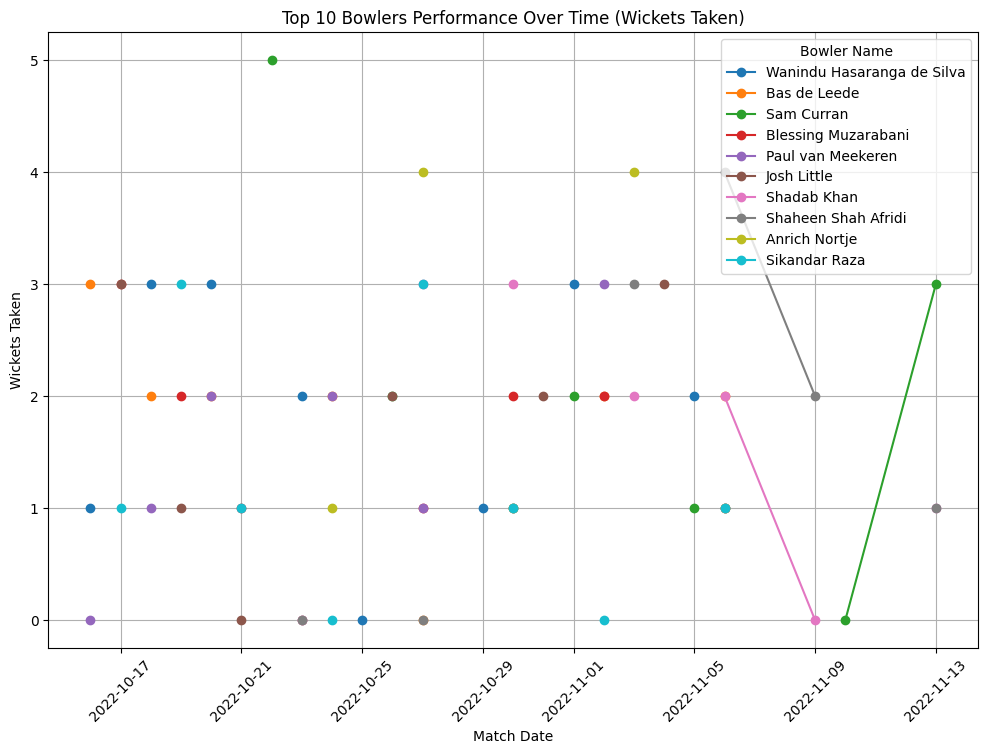

In [22]:
bowler_performance_over_time = df_bowling.groupby(['matchDate', 'bowlerName'])['wickets'].sum().unstack()

top_10_bowler_performance = bowler_performance_over_time[top_10_bowlers_list]

plt.figure(figsize=(12, 8))
for bowler in top_10_bowler_performance.columns:
    plt.plot(top_10_bowler_performance.index, top_10_bowler_performance[bowler], marker='o', label=bowler)

plt.title('Top 10 Bowlers Performance Over Time (Wickets Taken)')
plt.xlabel('Match Date')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.legend(title='Bowler Name')
plt.grid()
plt.show()

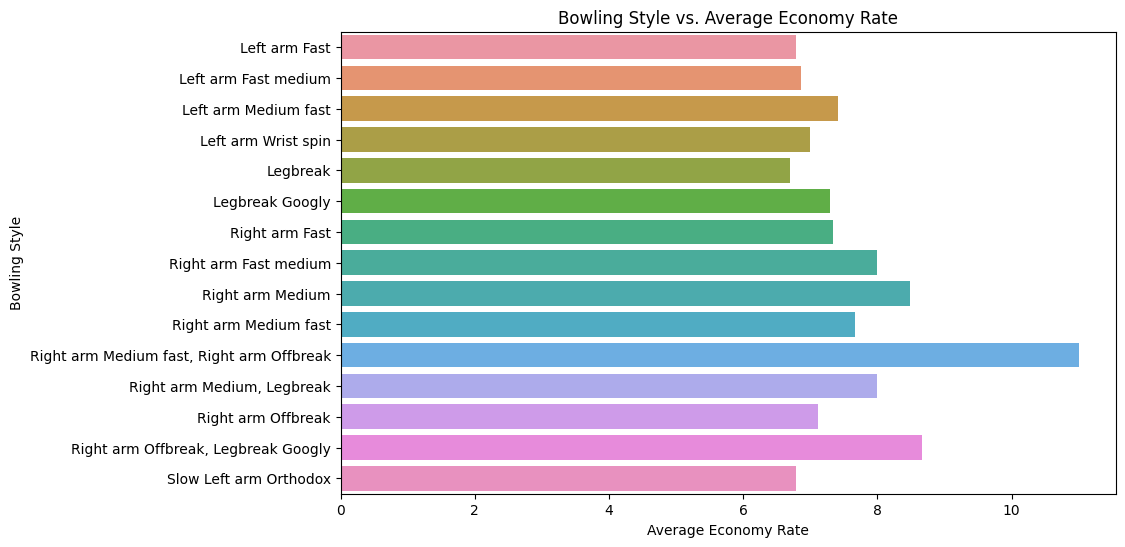

In [23]:
df_player = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_players.csv')

df_player.rename(columns={'name': 'player_name'}, inplace=True)

df_bowling = df_bowling.merge(df_player[['player_name', 'bowlingStyle']], left_on='bowlerName', right_on='player_name', how='left')

df_bowling.drop(columns=['player_name'], inplace=True)

style_performance = df_bowling.groupby('bowlingStyle').agg({
    'wickets': 'mean',
    'runs': 'mean',
    'overs': 'mean'
}).reset_index()

style_performance['Economy Rate'] = (style_performance['runs'] / style_performance['overs']).fillna(0)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy Rate', y='bowlingStyle', data=style_performance)
plt.title('Bowling Style vs. Average Economy Rate')
plt.xlabel('Average Economy Rate')
plt.ylabel('Bowling Style')
plt.show()

Match Analysis

In [24]:
match_winners = df_match['winner'].value_counts().reset_index()
match_winners.columns = ['Team', 'Matches Won']

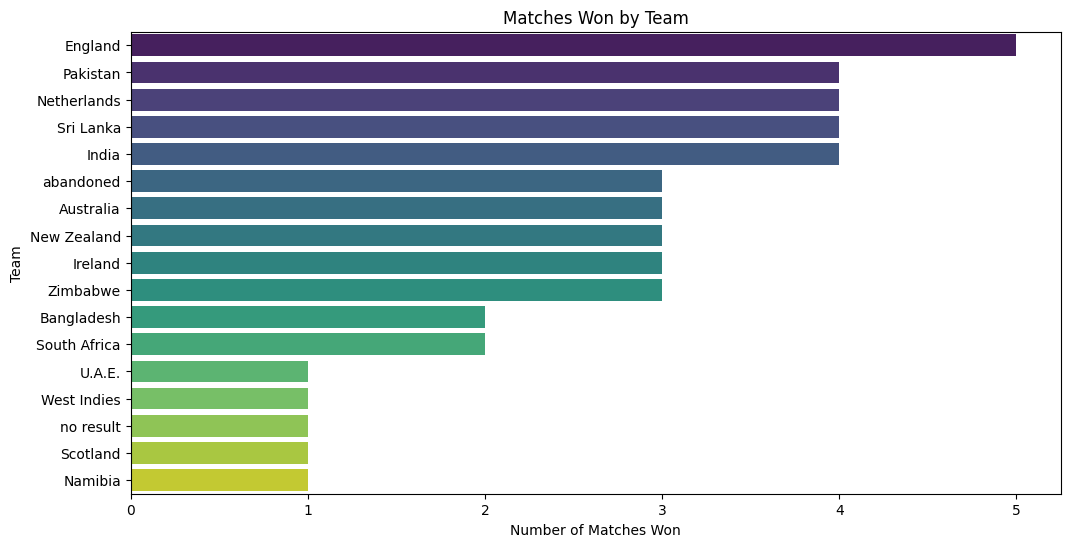

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Matches Won', y='Team', data=match_winners, palette='viridis')
plt.title('Matches Won by Team')
plt.xlabel('Number of Matches Won')
plt.ylabel('Team')
plt.show()

<Figure size 1400x800 with 0 Axes>

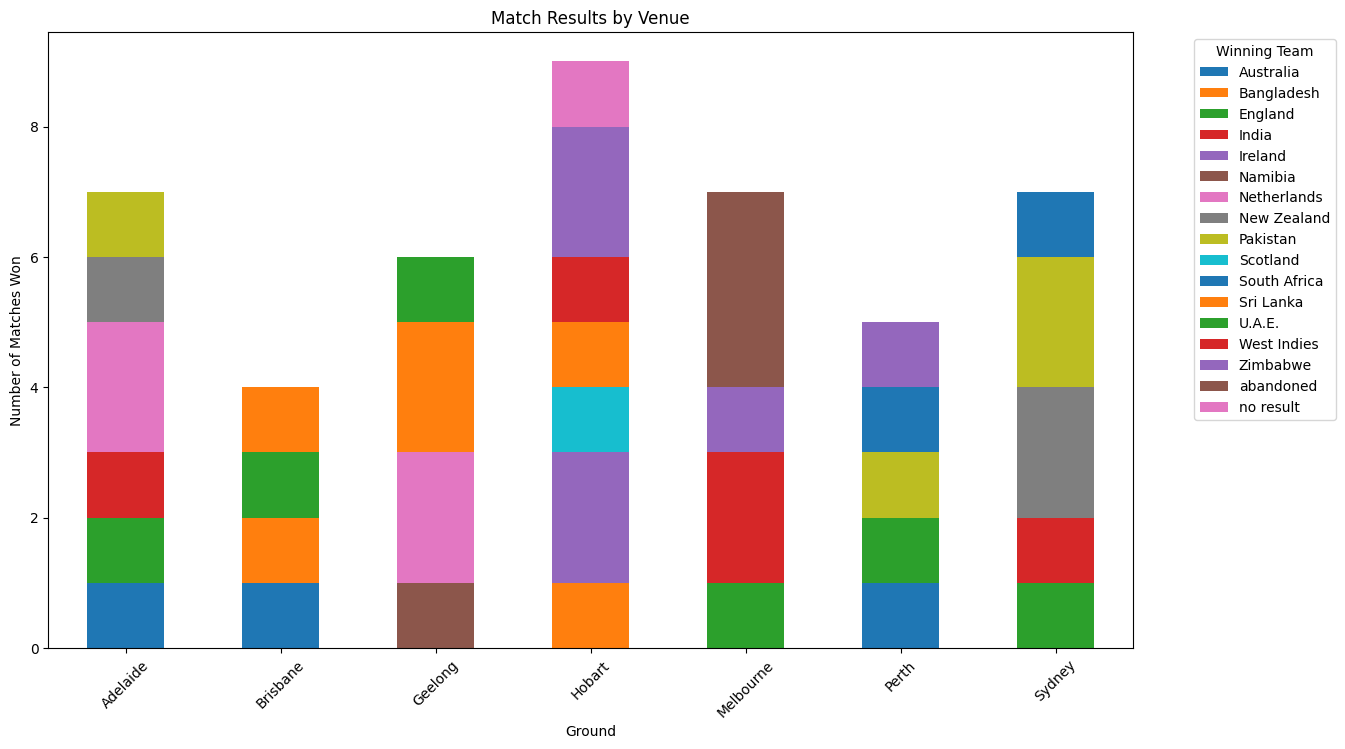

In [26]:
venue_performance = df_match.groupby('ground')['winner'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 8))
venue_performance.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Match Results by Venue')
plt.xlabel('Ground')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45)
plt.legend(title='Winning Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

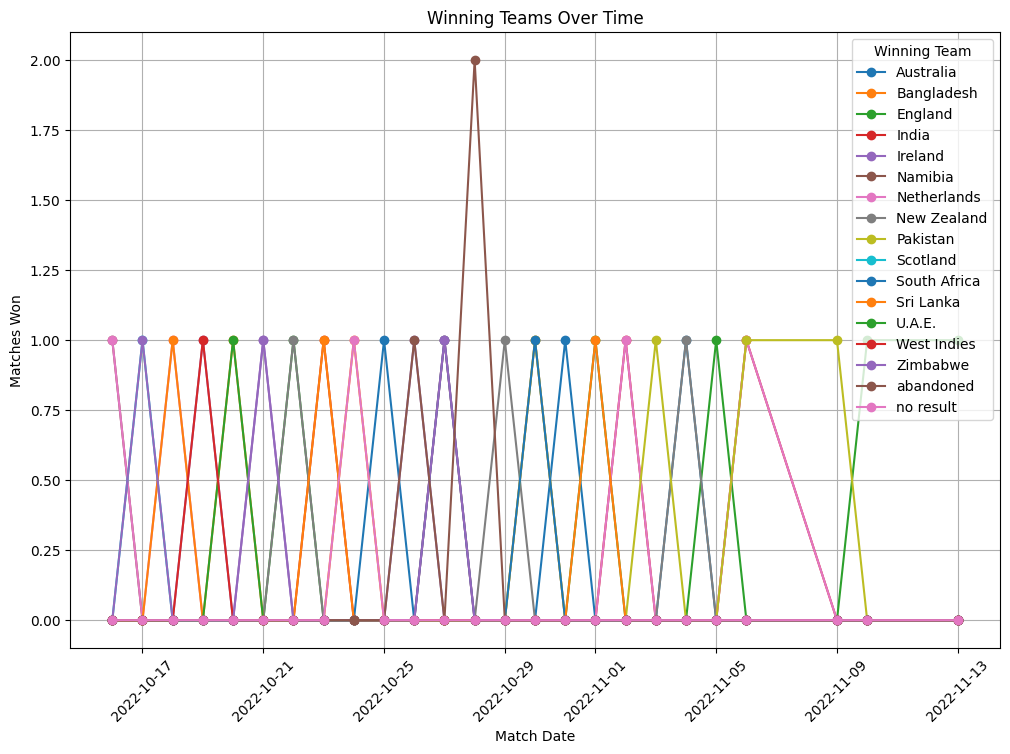

In [27]:
df_match['matchDate'] = pd.to_datetime(df_match['matchDate'])

matches_over_time = df_match.groupby(['matchDate', 'winner']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
for team in matches_over_time.columns:
    plt.plot(matches_over_time.index, matches_over_time[team], marker='o', label=team)

plt.title('Winning Teams Over Time')
plt.xlabel('Match Date')
plt.ylabel('Matches Won')
plt.xticks(rotation=45)
plt.legend(title='Winning Team')
plt.grid()
plt.show()

Players Analysis

In [28]:
batting_performance = df_batting.groupby('batsmanName').agg({
    'runs': 'sum',
    'balls': 'sum',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

bowling_performance = df_bowling.groupby('bowlerName').agg({
    'wickets': 'sum',
    'runs': 'sum',
    'overs': 'sum'
}).reset_index()

player_performance = pd.merge(batting_performance, bowling_performance, left_on='batsmanName', right_on='bowlerName', how='outer')
player_performance.fillna(0, inplace=True)
player_performance

,batsmanName,runs_x,balls,4s,6s,bowlerName,wickets,runs_y,overs
0,Aaron Finch(c),107.0,97.0,6.0,5.0,0,0.0,0.0,0.0
1,Aayan Afzal Khan,24.0,28.0,1.0,0.0,Aayan Afzal Khan,2.0,38.0,8.0
2,Adam Zampa,1.0,3.0,0.0,0.0,Adam Zampa,5.0,80.0,12.0
3,0,0.0,0.0,0.0,0.0,Adil Rashid,4.0,147.0,24.0
4,Afif Hossain,95.0,76.0,6.0,3.0,Afif Hossain,1.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...
214,Wessly Madhevere,106.0,83.0,15.0,2.0,Wessly Madhevere,0.0,25.0,3.0
215,Yasir Ali,5.0,9.0,0.0,0.0,0,0.0,0.0,0.0
216,Zahoor Khan,1.0,1.0,0.0,0.0,Zahoor Khan,5.0,57.0,12.0
217,Zane Greenâ€,2.0,3.0,0.0,0.0,0,0.0,0.0,0.0


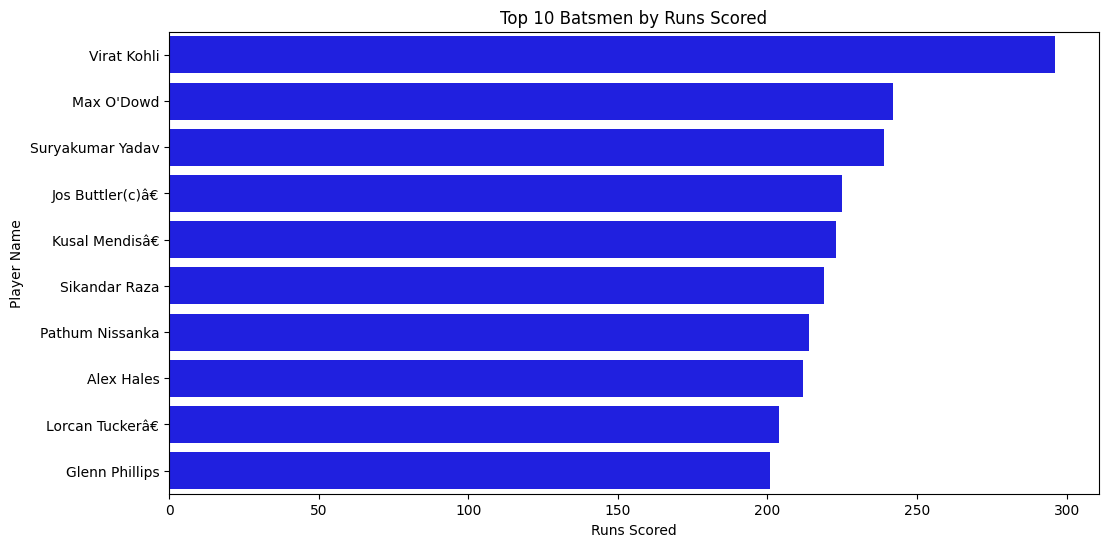

In [29]:
batting_performance = player_performance[['batsmanName', 'runs_x']].rename(columns={'batsmanName': 'Player', 'runs_x': 'Runs'})
top_batsmen = batting_performance.sort_values(by='Runs', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Runs', y='Player', data=top_batsmen, color='blue')
plt.title('Top 10 Batsmen by Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Player Name')
plt.show()

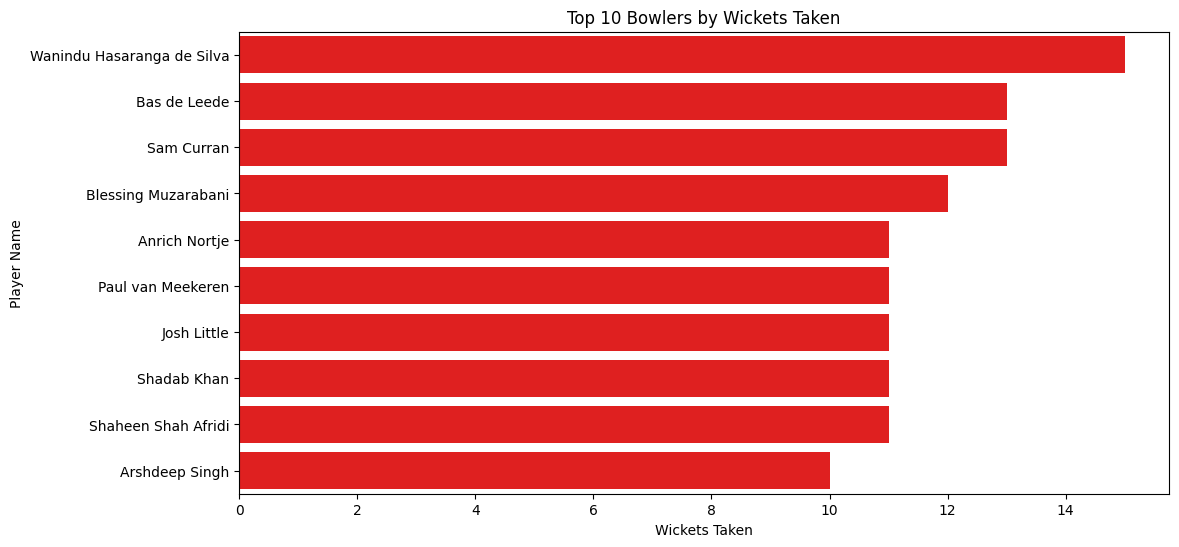

In [30]:
bowling_performance = player_performance[['bowlerName', 'wickets']].rename(columns={'bowlerName': 'Player', 'wickets': 'Wickets'})
top_bowlers = bowling_performance.sort_values(by='Wickets', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Wickets', y='Player', data=top_bowlers, color='red')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Player Name')
plt.show()

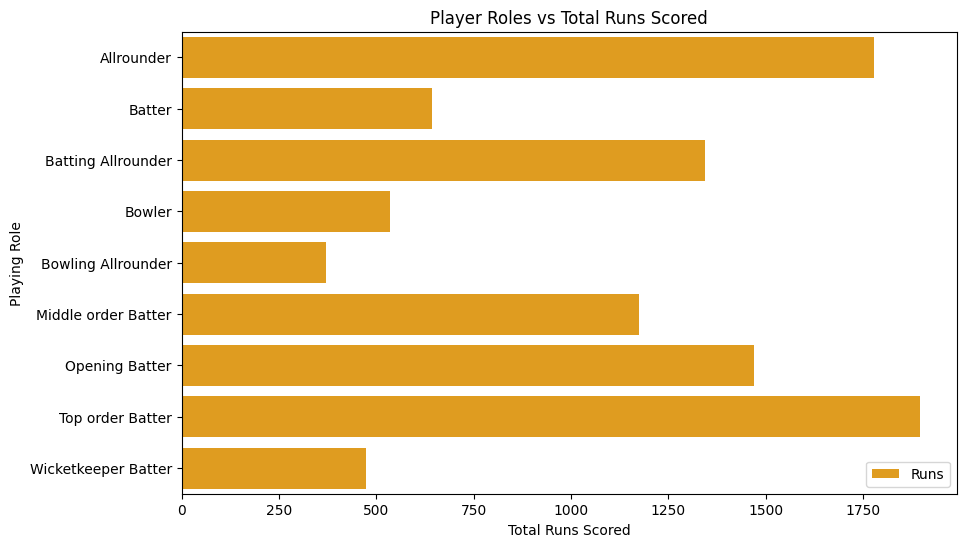

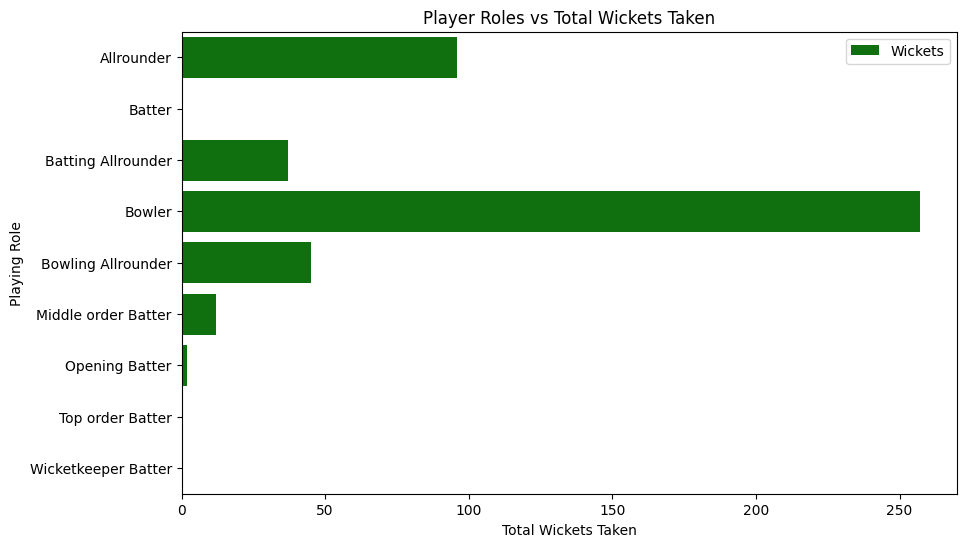

In [31]:
df_player['player_name'] = df_player['player_name'].str.strip()

player_performance = player_performance.merge(df_player[['player_name', 'playingRole']], 
                                              left_on='batsmanName', 
                                              right_on='player_name', 
                                              how='left')

player_performance.drop(columns=['player_name'], inplace=True, errors='ignore')

role_performance = player_performance.groupby('playingRole').agg({
    'runs_x': 'sum',  
    'wickets': 'sum'
}).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='runs_x', y='playingRole', data=role_performance, color='orange', label='Runs')
plt.title('Player Roles vs Total Runs Scored')
plt.xlabel('Total Runs Scored')
plt.ylabel('Playing Role')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='wickets', y='playingRole', data=role_performance, color='green', label='Wickets')
plt.title('Player Roles vs Total Wickets Taken')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Playing Role')
plt.legend()
plt.show()

In [32]:
df_match['matchDate'] = pd.to_datetime(df_match['matchDate'], errors='coerce')  

In [33]:
runs_over_time = df_batting.groupby(['match_id', 'batsmanName'])['runs'].sum().unstack().fillna(0)
wickets_over_time = df_bowling.groupby(['match_id', 'bowlerName'])['wickets'].sum().unstack().fillna(0)

In [34]:
runs_over_time = runs_over_time.merge(df_match[['match_id', 'matchDate']], on='match_id')
wickets_over_time = wickets_over_time.merge(df_match[['match_id', 'matchDate']], on='match_id')

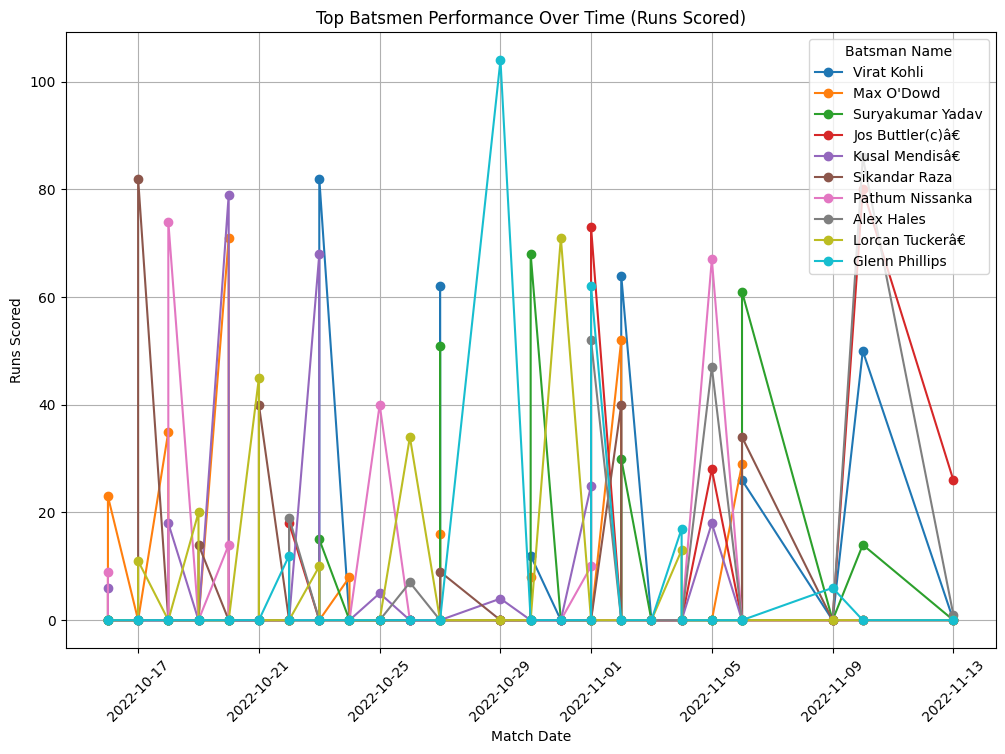

In [35]:
plt.figure(figsize=(12, 8))
for player in top_batsmen['Player']:  
    if player in runs_over_time.columns:
        plt.plot(runs_over_time['matchDate'], runs_over_time[player], marker='o', label=player)

plt.title('Top Batsmen Performance Over Time (Runs Scored)')
plt.xlabel('Match Date')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.legend(title='Batsman Name')
plt.grid()
plt.show()

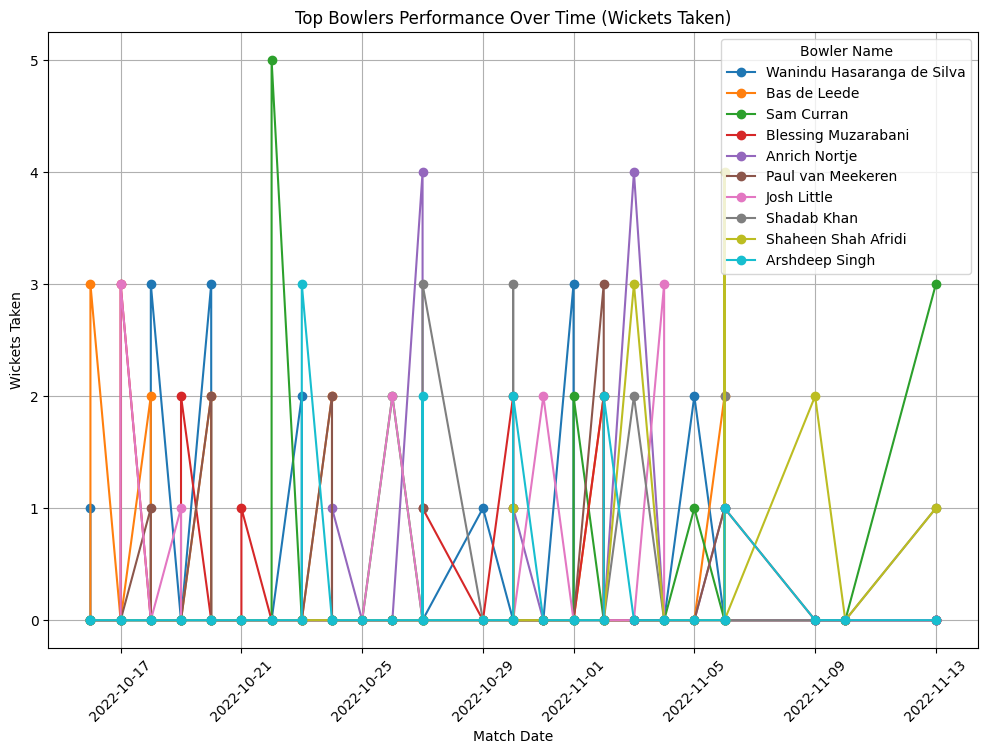

In [36]:
plt.figure(figsize=(12, 8))
for player in top_bowlers['Player']: 
    if player in wickets_over_time.columns:
        plt.plot(wickets_over_time['matchDate'], wickets_over_time[player], marker='o', label=player)

plt.title('Top Bowlers Performance Over Time (Wickets Taken)')
plt.xlabel('Match Date')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45)
plt.legend(title='Bowler Name')
plt.grid()
plt.show()